In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchsummary import summary
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (2.0.3) or chardet (5.1.0)/charset_normalizer (3.1.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
# Load dữ liệu từ bộ dữ liệu MNIST
train_dataset = MNIST(root='./data', train=True, transform=ToTensor(), download=True)
test_dataset = MNIST(root='./data', train=False, transform=ToTensor())

In [4]:
# Tạo DataLoader tải dữ liệu dạng batch
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [5]:
# Mô hình ANN
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

In [6]:
model = ANN().to(device)

In [7]:
# Hàm loss và optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [8]:
train_loss_history = []
train_acc_history = []
# Huấn luyện mô hình
num_epochs = 10
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}')
    # Đánh giá trên tập huấn luyện và tính accuracy
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_accuracy = correct / total
        train_loss_history.append(loss.item())
        train_acc_history.append(train_accuracy)
        print(f'Train Accuracy: {100*train_accuracy:.2f}%')
    #Tính accuracy trên tập kiểm tra
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        test_accuracy = correct / total
        print(f'Test Accuracy: {100*test_accuracy:.2f}%')

Epoch [1/10], Step [100/938], Loss: 1.6545
Epoch [1/10], Step [200/938], Loss: 1.5996
Epoch [1/10], Step [300/938], Loss: 1.5738
Epoch [1/10], Step [400/938], Loss: 1.5505
Epoch [1/10], Step [500/938], Loss: 1.5273
Epoch [1/10], Step [600/938], Loss: 1.5623
Epoch [1/10], Step [700/938], Loss: 1.5678
Epoch [1/10], Step [800/938], Loss: 1.5226
Epoch [1/10], Step [900/938], Loss: 1.5441
Train Accuracy: 92.97%
Test Accuracy: 92.85%
Epoch [2/10], Step [100/938], Loss: 1.5393
Epoch [2/10], Step [200/938], Loss: 1.5286
Epoch [2/10], Step [300/938], Loss: 1.5406
Epoch [2/10], Step [400/938], Loss: 1.5748
Epoch [2/10], Step [500/938], Loss: 1.5206
Epoch [2/10], Step [600/938], Loss: 1.5333
Epoch [2/10], Step [700/938], Loss: 1.5762
Epoch [2/10], Step [800/938], Loss: 1.5167
Epoch [2/10], Step [900/938], Loss: 1.5338
Train Accuracy: 94.25%
Test Accuracy: 94.02%
Epoch [3/10], Step [100/938], Loss: 1.5070
Epoch [3/10], Step [200/938], Loss: 1.5432
Epoch [3/10], Step [300/938], Loss: 1.5342
Epoch [

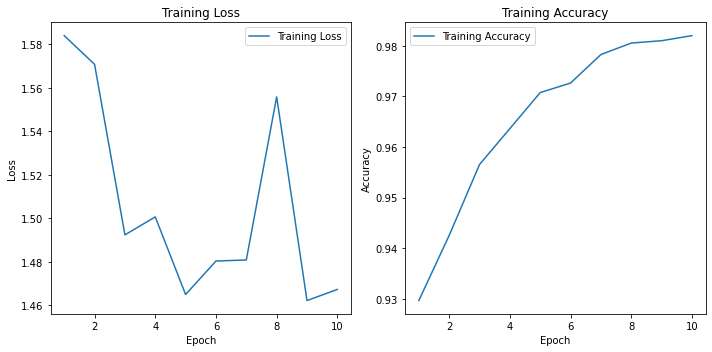

In [9]:
# Đồ thị loss và accuracy
epochs = range(1, num_epochs+1)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss_history, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc_history, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.tight_layout()
plt.show()